# // MULTICLASS CLASSIFICATION USING LOGISTIC REGRESSION //

#Importing necessary libraries for data preprocessing

In [1]:
import pandas as pd #For reading the dataset and to perform framing functions if needed
import numpy as np  #linear algebra function
import matplotlib.pyplot as plt #for visualizing the data
import seaborn as sns #for data distribution
import warnings
warnings.filterwarnings("ignore")

#Importing the dataset
I have used a 'Quality of wine dataset' to perform this multiclass classification

In [2]:
#---> Replace the path name for your path name
wine_data=pd.read_csv('C:/Users/ADMIN/Documents/Data science algorithms/winequality-red.csv')

Analysing and preprocessing the data

In [3]:
wine_data.head()   #---> First 5 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#Our aim to predict the quality of the wine with the given features (good is 7>=, bad is 3,4,neutral is 5,6)

In [4]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
wine_data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
wine_data.isnull().sum() #----> For checking null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


#Data distribution chart

<Axes: xlabel='quality', ylabel='count'>

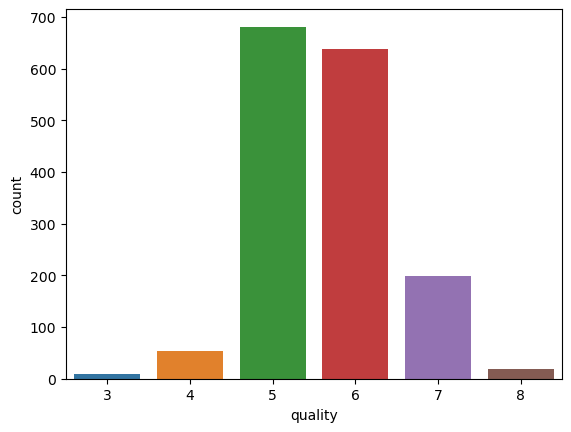

In [8]:
sns.countplot(x='quality',data=wine_data)

In [9]:
x=wine_data.iloc[:,:11]
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [10]:
y=wine_data.quality.replace({3:['Bad'],4:['Bad'],5:['Neutral'],6:['Neutral'],7:['Good'],8:['Good']})
y.head()

0    Neutral
1    Neutral
2    Neutral
3    Neutral
4    Neutral
Name: quality, dtype: object

In [11]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1599 entries, 0 to 1598
Series name: quality
Non-Null Count  Dtype 
--------------  ----- 
1599 non-null   object
dtypes: object(1)
memory usage: 12.6+ KB


#splitting the dataset into train and test parts

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)

#Training the multiclass model

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.fit(x_test)
model=LogisticRegression()

In [15]:
params={'penalty':['l1','elasticnet'],
        'solver':['newton-cg','sag','saga'],
       'multi_class':['auto','ovr','multinomial']}

In [16]:
regressor_model=GridSearchCV(model,params,scoring='accuracy',cv=5)
regressor_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'elasticnet'],
                         'solver': ['newton-cg', 'sag', 'saga']},
             scoring='accuracy')

In [17]:
regressor_model.best_params_

{'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'saga'}

In [18]:
train_predictions=regressor_model.predict(x_train)
train_predictions.flatten()

array(['Neutral', 'Neutral', 'Neutral', ..., 'Neutral', 'Good', 'Good'],
      dtype=object)

In [19]:
from sklearn import metrics
print(metrics.classification_report(y_train,train_predictions))

              precision    recall  f1-score   support

         Bad       1.00      0.02      0.04        45
        Good       0.68      0.30      0.42       150
     Neutral       0.86      0.98      0.91       924

    accuracy                           0.85      1119
   macro avg       0.85      0.43      0.46      1119
weighted avg       0.84      0.85      0.81      1119



In [20]:
print(metrics.confusion_matrix(y_train,train_predictions))

[[  1   1  43]
 [  0  45 105]
 [  0  20 904]]


The model has predicted an accuracy of 85%. The confusion matrix has stated more on netural due to the more available data related to neutral from the data distribution graph 